# **Working with Different file Formats**


*   JSON(Java Script Object Notation)
*   CSV(Comma Seperated Value)
*   Excel
*   Avro

The source data can be in various forms, and it is our ablitiy to handle different forms of data from different sources. So, it is that important to learn how to handle the data from different file formats.




## Working in JSON files

***
Since its inception, JSON has quickly become the de facto standard for information exchange.

Chances are you’re here because you need to transport some data from here to there. Perhaps you’re gathering information through an API or storing your data in a document database.

One way or another, you’re up to your neck in JSON, and you’ve got to Python your way out.








## A (Very) Brief History of JSON

JSON stangs for JavaScript Object Notation was inspired by a subset of the JavaScript programming language dealing with object literal syntax.

Ultimately, the community at large adopted JSON because it’s easy for both humans and machines to create and understand.

### Look, it’s JSON!
```
{
    "firstName": "Paranthaman",
    "lastName": "Dhananjeyan",
    "hobbies": ["listening to songs", "driving to temples"],
    "age": 60,
    "children": [
        {
            "firstName": "Balamuruga",
            "age": 25
        },
        {
            "firstName": "Divya",
            "age": 28
        }
    ]
}
```


# The JSON looks similar to **Dictionary object**

In [13]:
import json

Writing JSON Files ⛳

In [14]:
data = {
    'cricketer' : {
        'name' : 'MSD',
        'team' : 'CSK'
    }
}

In [15]:
data

{'cricketer': {'name': 'MSD', 'team': 'CSK'}}

In [16]:
with open('cricketer.json', 'w') as write_file:
  json.dump(data, write_file)

 Note that `dump()` takes two positional arguments:
 1. the data object to be serialized, and
 2. the file-like object to which the bytes will be written.

In [17]:
#reading Json

with open('cricketer.json', 'r') as read_file:
  filedata = json.load(read_file)

In [18]:
filedata

{'cricketer': {'name': 'MSD', 'team': 'CSK'}}

***read Json as Dataframe with the help of Pandas***

In [19]:
#writing the json data in a string format
#the string format is always double quotes for JSON

jsonStr = '''{"course1" : {"name" : "Python basics","discount" : "30%"},
              "course2" : {"name" : "Machine Learning","discount" : "20%"},
              "course3" : {"name" : "Deep Learning","discount" : "10%"}}'''


In [20]:
import pandas as pd

df = pd.read_json(jsonStr, orient ='index')
print(df)

                     name discount
course1     Python basics      30%
course2  Machine Learning      20%
course3     Deep Learning      10%


In [21]:
data["cricketer"]

{'name': 'MSD', 'team': 'CSK'}

In [22]:
df1 = pd.DataFrame.from_dict(data, orient ='index')


In [23]:
print(df1)

          name team
cricketer  MSD  CSK


## Working with CSV files

A CSV file (Comma Separated Values file) is a type of plain text file that uses specific structuring to arrange tabular data.

It’s a plain text file that has data separated by commas!

```
name, age, gender, city
bala, 26, male, chennai
divya, 29, female, chengulpattu
aravind, 24, male, chennai
gayathri, 22, female, vellore
...
```

In [24]:
import pandas as pd

df = pd.read_csv('/content/hrdata.csv', index_col='Name')
print(df)

               Hire Date   Salary  Sick Days remaining
Name                                                  
Graham Chapman  03/15/14  50000.0                   10
John Cleese     06/01/15  65000.0                    8
Eric Idle       05/12/14  45000.0                   10
Terry Jones     11/01/13  70000.0                    3
Terry Gilliam   08/12/14  48000.0                    7
Michael Palin   05/23/13  66000.0                    8


In [25]:
df.head()

Hire Date   Salary  Sick Days remaining
Name                                                  
Graham Chapman  03/15/14  50000.0                   10
John Cleese     06/01/15  65000.0                    8
Eric Idle       05/12/14  45000.0                   10
Terry Jones     11/01/13  70000.0                    3
Terry Gilliam   08/12/14  48000.0                    7

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, Graham Chapman to Michael Palin
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Hire Date            6 non-null      object 
 1   Salary               6 non-null      float64
 2   Sick Days remaining  6 non-null      int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 192.0+ bytes


In [27]:
df = pd.read_csv('/content/hrdata.csv', index_col='Name', parse_dates = ['Hire Date'])

<ipython-input-27-13e7f1bcac78>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('/content/hrdata.csv', index_col='Name', parse_dates = ['Hire Date'])


In [28]:
df.head()

Hire Date   Salary  Sick Days remaining
Name                                                   
Graham Chapman 2014-03-15  50000.0                   10
John Cleese    2015-06-01  65000.0                    8
Eric Idle      2014-05-12  45000.0                   10
Terry Jones    2013-11-01  70000.0                    3
Terry Gilliam  2014-08-12  48000.0                    7

In [29]:
df.to_csv('/content/hrdata_modified.csv')

In [30]:
df

Hire Date   Salary  Sick Days remaining
Name                                                   
Graham Chapman 2014-03-15  50000.0                   10
John Cleese    2015-06-01  65000.0                    8
Eric Idle      2014-05-12  45000.0                   10
Terry Jones    2013-11-01  70000.0                    3
Terry Gilliam  2014-08-12  48000.0                    7
Michael Palin  2013-05-23  66000.0                    8

## Working with Excel Files

Excel spreadsheets are one of those things you might have to deal with at some point. Either it’s because your boss loves them or because marketing needs them, and you might have to learn how to work with spreadsheets.

Many companies still prefer using Excel files for their data storage and analysis, as a data expert you should know how to handle these files programatically!

To work with Excel files we have package in python `openpyxl`

In [31]:
pip install openpyxl


# **Basics Of Excel**








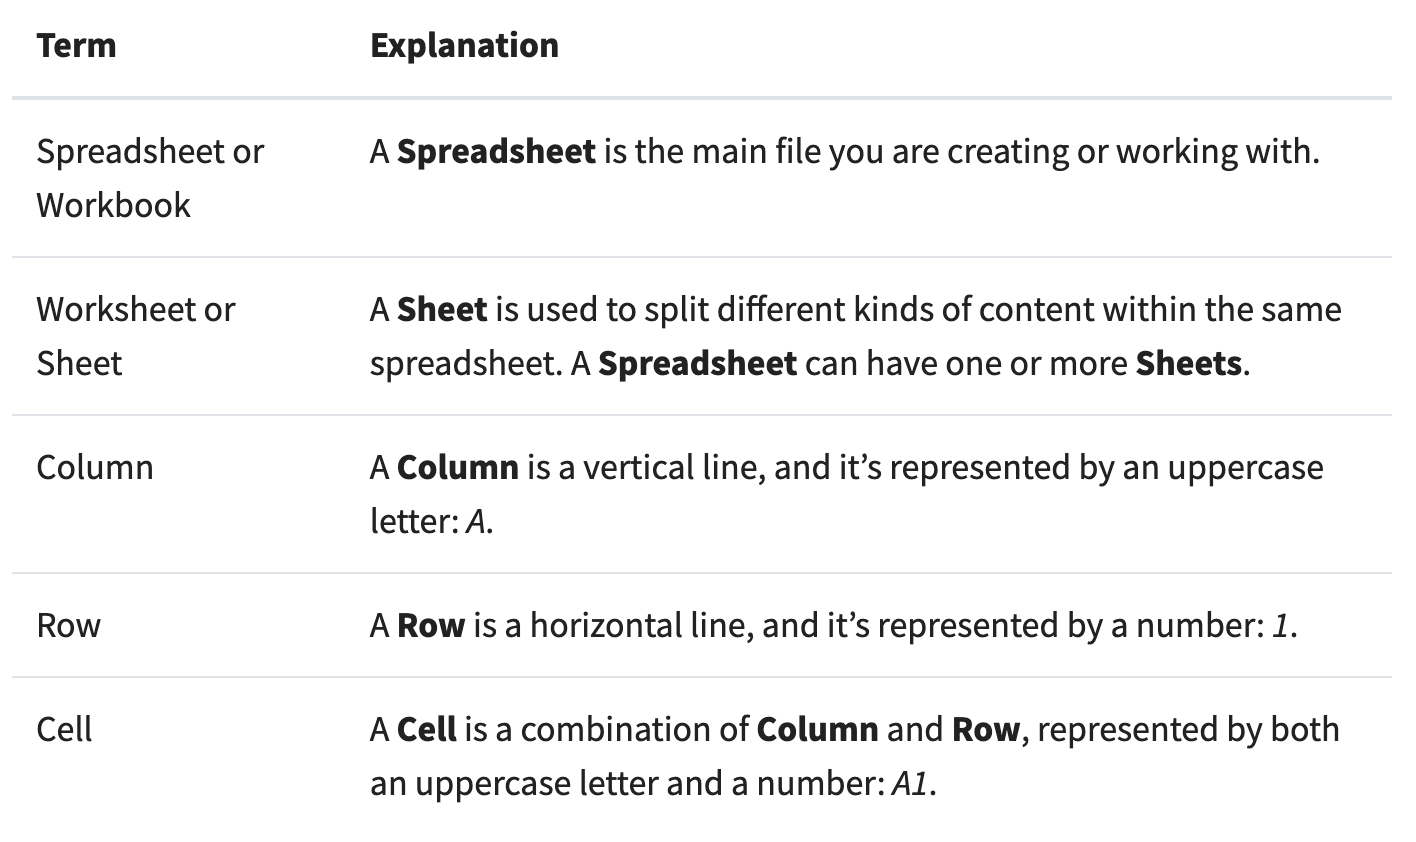

In [32]:
from openpyxl import Workbook

workbook = Workbook()

In [33]:
sheet = workbook.active

In [34]:
sheet['A1'] = "hello"
sheet['B1'] = "world"

workbook.save(filename = 'helloworld.xlsx')

In [35]:
#reading excel files

from openpyxl import load_workbook

workbook = load_workbook(filename = 'helloworld.xlsx')

In [36]:
workbook

In [37]:
workbook = load_workbook(filename = '/content/sample-xlsx-file.xlsx')

In [38]:
workbook.sheetnames

['Employee', 'Department']

In [39]:
sheet = workbook.active

In [40]:
sheet

<Worksheet "Employee">

In [41]:
sheet.title

'Employee'

In [42]:
sheet['A1']

<Cell 'Employee'.A1>

In [43]:
sheet['A2']

<Cell 'Employee'.A2>

In [44]:
sheet['A1'].value

'Name'

In [45]:
sheet.cell(row = 10, column = 10)

<Cell 'Employee'.J10>

In [46]:
sheet.cell(row = 3, column = 3).value

datetime.datetime(1965, 1, 13, 0, 0)

In [47]:
#slicing

sheet['A1':'C3']

((<Cell 'Employee'.A1>, <Cell 'Employee'.B1>, <Cell 'Employee'.C1>),
 (<Cell 'Employee'.A2>, <Cell 'Employee'.B2>, <Cell 'Employee'.C2>),
 (<Cell 'Employee'.A3>, <Cell 'Employee'.B3>, <Cell 'Employee'.C3>))

In [48]:
#print rows in the current sheet

for row in sheet.iter_rows(values_only = True):
  print(row)

('Name', 'Email', 'Date Of Birth', 'Salary', 'Department', None, None, None, None, None)
('Rajeev Singh', 'rajeev@example.com', datetime.datetime(1992, 7, 21, 0, 0), 1500000.0, 'Software Engineering', None, None, None, None, None)
('John Doe', 'john@example.com', datetime.datetime(1965, 1, 13, 0, 0), 1300000.0, 'Sales', None, None, None, None, None)
('Jack Sparrow', 'jack@example.com', datetime.datetime(1986, 12, 19, 0, 0), 1000000.0, 'HR', None, None, None, None, None)
('Steven Cook', 'steven@example.com', datetime.datetime(1994, 5, 4, 0, 0), 1200000.0, 'Marketing', None, None, None, None, None)
(None, None, None, None, None, None, None, None, None, None)
(None, None, None, None, None, None, None, None, None, None)
(None, None, None, None, None, None, None, None, None, None)
(None, None, None, None, None, None, None, None, None, None)
(None, None, None, None, None, None, None, None, None, None)


### You can read Excel file as DataFrame using Pandas

In [49]:
excel_df = pd.read_excel('/content/sample-xlsx-file.xlsx', parse_dates=['Date Of Birth'])

In [50]:
excel_df

Name               Email Date Of Birth   Salary  \
0  Rajeev Singh  rajeev@example.com    1992-07-21  1500000   
1      John Doe    john@example.com    1965-01-13  1300000   
2  Jack Sparrow    jack@example.com    1986-12-19  1000000   
3   Steven Cook  steven@example.com    1994-05-04  1200000   

             Department  
0  Software Engineering  
1                 Sales  
2                    HR  
3             Marketing

In [51]:
excel_df.to_excel('/content/sample-xlsx-file_modified.xlsx')

# Working with Avro

Apache Avro is a data serialization format. We can store data as `.avro` files on disk.

Avro files are typically used with Spark but Spark is completely independent of Avro.

Avro is a row-based format that is suitable for evolving data schemas. One benefit of using Avro is that schema and metadata travels with the data.

If you have an .avro file, you have the schema of the data as well.

The Apache Avro Specification provides easy-to-read yet detailed information.

In [52]:
pip install avro-python3

  Preparing metadata (setup.py) ... done
  Created wheel for avro-python3: filename=avro_python3-1.10.2-py3-none-any.whl size=43992 sha256=3874a60b9c67cb6250d38cf38f1b19252262aeb6ec557dd63acc5351e5079748
  Stored in directory: /root/.cache/pip/wheels/bc/85/62/6cdd81c56f923946b401cecff38055b94c9b766927f7d8ca82
Successfully built avro-python3


In [53]:
# Python 3 with `avro-python3` package available
import copy
import json
import avro
from avro.datafile import DataFileReader, DataFileWriter
from avro.io import DatumReader, DatumWriter

In [54]:
# Note that we combined namespace and name to get "full name"
schema = {
    'name': 'avro.example.User',
    'type': 'record',
    'fields': [
        {'name': 'name', 'type': 'string'},
        {'name': 'age', 'type': 'int'}
    ]
}

# Parse the schema so we can use it to write the data
schema_parsed = avro.schema.Parse(json.dumps(schema))

In [56]:
schema_parsed

In [57]:
# Write data to an avro file
with open('users.avro', 'wb') as file_avro:
    writer = DataFileWriter(file_avro, DatumWriter(), schema_parsed)
    writer.append({'name': 'Paranthaman Dnananjeyan', 'age': 60})
    writer.append({'name': 'Sumathi Paranthaman', 'age': 50})
    writer.close()

In [58]:
# Read data from an avro file
with open('users.avro', 'rb') as file_avro:
    reader = DataFileReader(file_avro, DatumReader())
    metadata = copy.deepcopy(reader.meta)
    schema_from_file = json.loads(metadata['avro.schema'])
    users = [user for user in reader]
    reader.close()

print(f'Schema that we specified:\n {schema}')
print(f'Schema that we parsed:\n {schema_parsed}')
print(f'Schema from users.avro file:\n {schema_from_file}')
print(f'Users:\n {users}')

Schema that we specified:
 {'name': 'avro.example.User', 'type': 'record', 'fields': [{'name': 'name', 'type': 'string'}, {'name': 'age', 'type': 'int'}]}
Schema that we parsed:
 {"type": "record", "name": "User", "namespace": "avro.example", "fields": [{"type": "string", "name": "name"}, {"type": "int", "name": "age"}]}
Schema from users.avro file:
 {'type': 'record', 'name': 'User', 'namespace': 'avro.example', 'fields': [{'type': 'string', 'name': 'name'}, {'type': 'int', 'name': 'age'}]}
Users:
 [{'name': 'Paranthaman Dnananjeyan', 'age': 60}, {'name': 'Sumathi Paranthaman', 'age': 50}]


### Reading Avro Using Pandas

Avro format simply requires a schema and a list of records. We don’t need a dataframe to handle Avro files.

However, we can write a `pandas` dataframe into an Avro file or read an Avro file into a `pandas` dataframe.

To begin with, we can always represent a dataframe as a list of records and vice-versa

In [59]:
pip install pandavro

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 14.0 MB/s eta 0:00:00


In [60]:
import copy
import json
import pandas as pd
import pandavro as pdx
from avro.datafile import DataFileReader
from avro.io import DatumReader

In [61]:
# Data to be saved
users = [{'name': 'Pierre-Simon Laplace', 'age': 77},
         {'name': 'John von Neumann', 'age': 53}]
users_df = pd.DataFrame.from_records(users)
print(users_df)

                   name  age
0  Pierre-Simon Laplace   77
1      John von Neumann   53


In [63]:
pdx.to_avro('/content/users_test.avro', users_df)

In [ ]:
# Read the data back
users_df_redux = pdx.from_avro('data/users_test.avro')
print(type(users_df_redux))
# <class 'pandas.core.frame.DataFrame'>


<class 'pandas.core.frame.DataFrame'>


In [64]:
# Check the schema for "users.avro"
with open('users.avro', 'rb') as file_avro:
    reader = DataFileReader(file_avro, DatumReader())
    metadata = copy.deepcopy(reader.meta)
    schema_from_file = json.loads(metadata['avro.schema'])
    reader.close()
print(schema_from_file)

{'type': 'record', 'name': 'User', 'namespace': 'avro.example', 'fields': [{'type': 'string', 'name': 'name'}, {'type': 'int', 'name': 'age'}]}
